In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from cmath import phase, polar
from scipy.special import jv as besselj
from scipy.special import hankel2 as besselh

from scipy.optimize import fsolve
from math import cos, pi, e

from scipy.integrate import simps
from scipy.signal import find_peaks
import os
import random
import time 

np.random.seed(1)

from importlib import reload  
import asym_shell_help_func
reload(asym_shell_help_func)
    
from asym_shell_help_func import get_coefficients, get_refractive_index

%matplotlib inline

In [9]:
plasmonic_metal = 'silver'

In [10]:
if not os.path.exists('figures'):
    os.mkdir('figures')

In [11]:
def SCS_figures(r_extern_list, r_intern_list, dist_between_centers_list, alpha_incident_list, fig_name, plasm_metal):
    
    Lyambda_range = np.arange(300, 601, 1)
#     plt.figure(figsize=(7.2, 4.8))

    plt.figure()

    for k1 in range(len(r_extern_list)):
        r_ext = r_extern_list[k1]
        for k2 in range(len(r_intern_list)):
            r_int = r_intern_list[k2]
            for k3 in range(len(dist_between_centers_list)):
                dist_between_centers = dist_between_centers_list[k3]
                for k4 in range(len(alpha_incident_list)):
                    alpha_incident = alpha_incident_list[k4]
                    
                    # normalization
                    r0=r_ext # radius (nm)
                    h_ratio = r_int / r_ext
                    dist_btw_centers = dist_between_centers / r_ext
                    N_truncation_number = 15
                    SCS = []
                    for i in range(len(Lyambda_range)):
                        lyambda_current = Lyambda_range[i]
                        w0_incident_current = 2*pi*r_ext/lyambda_current
                        n_value, k_value = get_refractive_index(lyambda_current, plasm_metal)
                        n_plasma_refr_index_current = n_value - 1.j * k_value
                        a_m, b_m,  c_m, d_m= get_coefficients(w0_incident_current, n_plasma_refr_index_current, h_ratio, \
                                                              alpha_incident, N_truncation_number, dist_btw_centers) 
                        if a_m == []:
                            print('The system does not converge for this parameters')
                            break
                        res = 0
                        for m in range(-N_truncation_number, N_truncation_number + 1):
                            res = res + np.abs(d_m[m + N_truncation_number]) ** 2
                        SCS.append(4 * res[0] / w0_incident_current)

                    if alpha_incident == 0:
                        alpha_val = 0
                    else:
                        alpha_val = 90
        
                    legend_lbl = 'R int = ' + str(r_int) + ' nm'
                    
                    if len(Lyambda_range) == len(SCS):         
                        plt.plot(Lyambda_range, SCS, label = legend_lbl)
       
    plt.legend(loc = 'upper right')
    plt.xlabel('wavelength (nm)')
    plt.ylabel('SCS')

    plt.savefig('figures/' + plasm_metal + '_' + fig_name + '.jpg', dpi = 100)

    return 


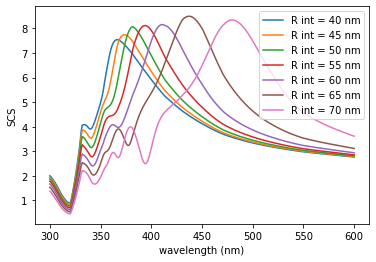

In [5]:
r_extern_list, r_intern_list, dist_between_centers_list, alpha_incident = [100], [40, 45, 50, 55, 60, 65, 70], [20], [pi/2]
fig_name = 'R_ext_100, R_int_varies, dist_20 '   
SCS_figures(r_extern_list, r_intern_list, dist_between_centers_list, alpha_incident, fig_name, plasmonic_metal)



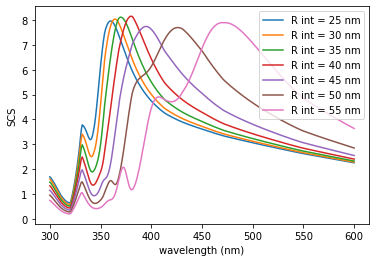

In [6]:
r_extern_list, r_intern_list, dist_between_centers_list, alpha_incident = [75], [25, 30, 35, 40, 45, 50, 55], [10], [pi/2]
fig_name = 'R_ext_75, R_int_varies, dist_10 '   
SCS_figures(r_extern_list, r_intern_list, dist_between_centers_list, alpha_incident, fig_name, plasmonic_metal)


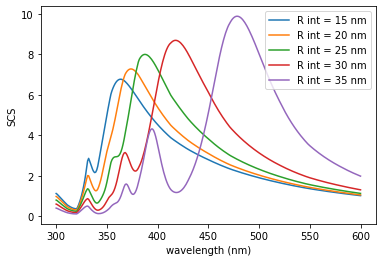

In [7]:
r_extern_list, r_intern_list, dist_between_centers_list, alpha_incident = [50], [15, 20, 25, 30, 35], [10], [pi/2]
fig_name = 'R_ext_50, R_int_varies, dist_10 '   
SCS_figures(r_extern_list, r_intern_list, dist_between_centers_list, alpha_incident, fig_name, plasmonic_metal)
